<a href="https://colab.research.google.com/github/lajaaiti/Alto_MVC_POO/blob/main/Copie_de_breifclassification_LSTMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('../data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



../data/data.csv


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df=pd.read_csv("../data/data.csv")
df

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
...,...,...
2220,business,cars pull down us retail figures us retail sal...
2221,politics,kilroy unveils immigration policy ex-chatshow ...
2222,entertainment,rem announce new glasgow concert us band rem h...
2223,politics,how political squabbles snowball it s become c...


In [ ]:
df.describe()

,category,text
count,2225,2225
unique,5,2126
top,sport,kennedy questions trust of blair lib dem leade...
freq,511,2


In [ ]:
df.dtypes

category    object
text        object
dtype: object

In [ ]:
df['category'].nunique()

5

In [ ]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


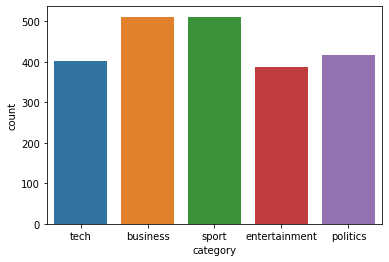

In [ ]:
sns.countplot(df['category'])

In [ ]:
df['text'][5]

'howard hits back at mongrel jibe michael howard has said a claim by peter hain that the tory leader is acting like an  attack mongrel  shows labour is  rattled  by the opposition.  in an upbeat speech to his party s spring conference in brighton  he said labour s campaigning tactics proved the tories were hitting home. mr hain made the claim about tory tactics in the anti-terror bill debate.  something tells me that someone  somewhere out there is just a little bit rattled   mr howard said. mr hain  leader of the commons  told bbc radio four s today programme that mr howard s stance on the government s anti-terrorism legislation was putting the country at risk. he then accused the tory leader of behaving like an  attack mongrel  and  playing opposition for opposition sake .  mr howard told his party that labour would  do anything  say anything  claim anything to cling on to office at all costs .  so far this year they have compared me to fagin  to shylock and to a flying pig. this mor

In [ ]:
df.isnull().sum()

category    0
text        0
dtype: int64

# TEXT CLEANING-->

In [ ]:
space = re.compile('[/(){}\[\]\|@,;]')
symbols= re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # lowercase text
    text = space.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = symbols.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text

In [ ]:
df['text']=df['text'].apply(clean_text)

In [ ]:
df['text'][5]

'howard hits back mongrel jibe michael howard said claim peter hain tory leader acting like attack mongrel shows labour rattled opposition upbeat speech party spring conference brighton said labour campaigning tactics proved tories hitting home mr hain made claim tory tactics antiterror bill debate something tells someone somewhere little bit rattled mr howard said mr hain leader commons told bbc radio four today programme mr howard stance government antiterrorism legislation putting country risk accused tory leader behaving like attack mongrel playing opposition opposition sake mr howard told party labour would anything say anything claim anything cling office costs far year compared fagin shylock flying pig morning peter hain even called mongrel know something tells someone somewhere little bit rattled environment secretary margaret beckett rejected mr howard comment telling radio 4 pm programme labour rattled real duty try get people focus michael howard record proposals trying put 

In [ ]:
df['text'][50]

'lewsey puzzle disallowed try england josh lewsey claimed denied late try side si nations loss ireland wasps wing insisted grounded ball bundled line said referee jonathan kaplan made wrong decision positive touched ball line lewsey told bbc sport certainly turnover driven put ball ground whistle went let go ball lewsey added one irish players scooped back whistle surprise referee gave turnover far concerned incident mark cueto effort charlie hodgson crossfield kick led looked like good try two key elements game cueto also puzzled try disallowed kaplan think could offside without doubt behind ball said sale player move planned technique cuff rehearse time time say robbed decisions go go today went us tough international level'

In [ ]:
g=[]
for i in df['text']:
  g.append(i)

len(g)  

2225

In [ ]:
len(g[4])

1207

In [ ]:
maxl = max([len(s) for s in g])
print ('Maximum sequence length in the list of sentences:', maxl)

Maximum sequence length in the list of sentences: 16201


# So this will be the maximum length of padding..

In [ ]:
tokenizer = Tokenizer(num_words=50000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 32485 unique tokens.


# As the length maximum length of the sequence is much, we will be selecting maximum length as 3000.

In [ ]:
X = tokenizer.texts_to_sequences(df['text'].values)
X = pad_sequences(X, maxlen=3000)

In [ ]:
X.shape

(2225, 3000)

In [ ]:
Y = pd.get_dummies(df['category'],columns=df["category"]).values
Y

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [ ]:
len(Y)

2225

In [ ]:
Y[0]

array([0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
Y[1]

array([1, 0, 0, 0, 0], dtype=uint8)

In [ ]:
Y[2]

array([0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
Y[2222]

array([0, 1, 0, 0, 0], dtype=uint8)

In [ ]:
Y[2223]

array([0, 0, 1, 0, 0], dtype=uint8)

In [ ]:
df.head(3)

,category,text
0,tech,tv future hands viewers home theatre systems p...
1,business,worldcom boss left books alone former worldcom...
2,sport,tigers wary farrell gamble leicester say rushe...


In [ ]:
df.tail(3)

,category,text
2222,entertainment,rem announce new glasgow concert us band rem a...
2223,politics,political squabbles snowball become commonplac...
2224,sport,souness delight euro progress boss graeme soun...


# 1st Label->business
# 2nd Label->entertainment
# 3rd Label->politics
# 4th Label->sport
# 5th Label->tech

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2002, 3000) (2002, 5)
(223, 3000) (223, 5)


# MODEL-->

In [ ]:
model=Sequential()
model.add(Embedding(50000,100,input_length=3000))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(5, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 3000, 100)         5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 3000, 100)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 5)                 505       
                                                                 
Total params: 5,080,905
Trainable params: 5,080,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, Y_train, epochs=7, batch_size=64,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/7
29/29 [==============================] - 399s 14s/step - loss: 1.5801 - accuracy: 0.2798 - val_loss: 1.5119 - val_accuracy: 0.5373
Epoch 2/7
29/29 [==============================] - 395s 14s/step - loss: 1.2351 - accuracy: 0.6158 - val_loss: 0.8329 - val_accuracy: 0.6766
Epoch 3/7
29/29 [==============================] - 396s 14s/step - loss: 0.6624 - accuracy: 0.7712 - val_loss: 0.5130 - val_accuracy: 0.7861
Epoch 4/7
29/29 [==============================] - 392s 14s/step - loss: 0.6081 - accuracy: 0.8240 - val_loss: 0.5128 - val_accuracy: 0.8756
Epoch 5/7
29/29 [==============================] - 392s 14s/step - loss: 0.2544 - accuracy: 0.9756 - val_loss: 0.2647 - val_accuracy: 0.9403
Epoch 6/7
29/29 [==============================] - 394s 14s/step - loss: 0.0692 - accuracy: 0.9883 - val_loss: 0.2127 - val_accuracy: 0.9303
Epoch 7/7
26/29 [=========================>....] - ETA: 40s - loss: 0.0486 - accuracy: 0.9904

In [ ]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

7/7 [==============================] - 5s 766ms/step - loss: 0.3344 - accuracy: 0.9103
Test set
  Loss: 0.334
  Accuracy: 0.910


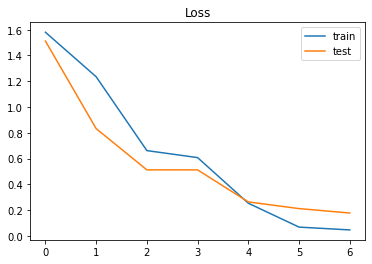

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

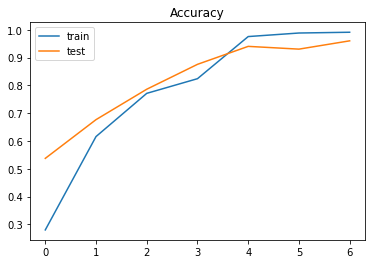

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
df['category'].value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: category, dtype: int64

# 1st Label->business
# 2nd Label->entertainment
# 3rd Label->politics
# 4th Label->sport
# 5th Label->tech

In [ ]:
new_complaint = ['Cricket Australia is set to begin the team’s pre-season later this month under a set of new training protocols devised for the safety of players amid the COVID-19 pandemic.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.03039647 0.08030961 0.71168256 0.15706766 0.02054367]] Politics


In [ ]:
new_complaint = ['Flipkart revealed the different items that Indians are looking for on the e-commerce site, as relaxing lockdown restrictions allow shopping to start again. Self-care and items to help work from home top the list, according to the e-commerce giant. ']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.09341135 0.18269098 0.44188258 0.18070874 0.10130631]] Politics


In [ ]:
new_complaint =['Additionally, the microsite on Amazon.in highlights some of the key features of the Mi 10. It shows that the phone will come with a 108-megapixel primary camera that will have optical image stabilisation (OIS) and 8K video recording. The microsite also claims that the Mi 10 will carry the worlds fastest wireless charging and include Qualcomm Snapdragon 865 SoC. You can also expect a 3D curved TrueColor E3 AMOLED display with a Corning Gorilla Glass protection on top and stereo speakers.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.34165728 0.10218859 0.04990356 0.1339604  0.37229016]] Tech


In [ ]:
new_complaint = ['Having undergone a surgery for shoulder dislocation last month, young Australian pacer Jhye Richardson is hopeful of recovering from the recurring injury by the time cricketing action resumes. Cricket Australias chief medical officer Alex Kountouris sounded optimistic of the fast bowlers recovery process with respect to a comeback later this year.Its a lengthy surgery but it does give him an opportunity now that were not going to play until ... September, October, November or December ... hes obviously a chance with that, Kountouris told News Corp in an interaction.']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=3000)
pred = model.predict(padded)
labels = ['Business','Entertainment','Politics','Sports','Tech']
print(pred, labels[np.argmax(pred)])

[[0.21461183 0.00611744 0.01570985 0.6997343  0.06382663]] Sports


# So we are seeing here that our model is predicting descently...